## Initiate Project

In [87]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

import warnings
warnings.filterwarnings("ignore")

RSEED = 42

In [88]:
# Read data
df_tanzania=pd.read_csv("data/Train.csv")

## Evaluate Target 

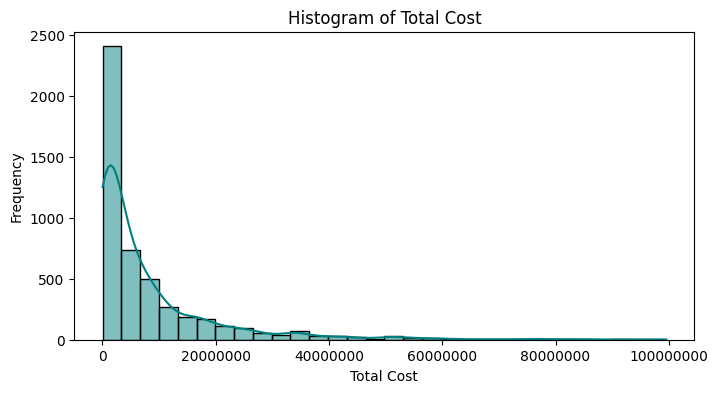

In [89]:
# Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_tanzania["total_cost"], bins=30, kde=True, color='teal')
plt.title('Histogram of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain')
plt.show()

<Axes: >

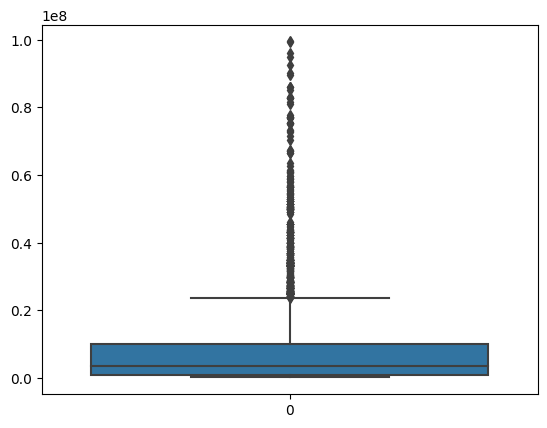

In [90]:
# Remove Outliers
sns.boxplot(df_tanzania["total_cost"])

In [91]:
# Define function to print the whiskers of a boxplot

def calculate_whiskers(df, column):
    """
    Calculate the lower and upper whiskers for a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to calculate whiskers for.

    Returns:
        tuple: (lower_whisker, upper_whisker)
    """
    # Get descriptive statistics for the column
    stats = df[column].describe()
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1

    # Calculate the lower whisker
    lower_whisker = max(
        df[column][df[column] >= (Q1 - 1.5 * IQR)].min(), 
        df[column].min()
    )
    
    # Calculate the upper whisker
    upper_whisker = min(
        df[column][df[column] <= (Q3 + 1.5 * IQR)].max(), 
        df[column].max()
    )
    
    return lower_whisker, upper_whisker

In [92]:
lower, upper = calculate_whiskers(df_tanzania, "total_cost")
print("Upper Whisker total cost", upper)

Upper Whisker total cost 23635950.0


In [93]:
#Remove outliers
df_tanzania = df_tanzania.query("total_cost <= 23635950.0")

<Axes: >

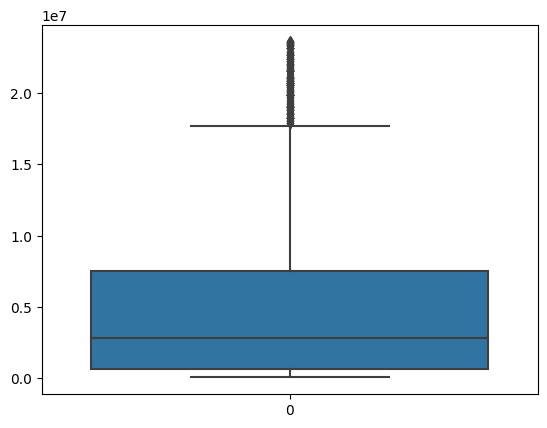

In [94]:
# Remove Outliers
sns.boxplot(df_tanzania["total_cost"])

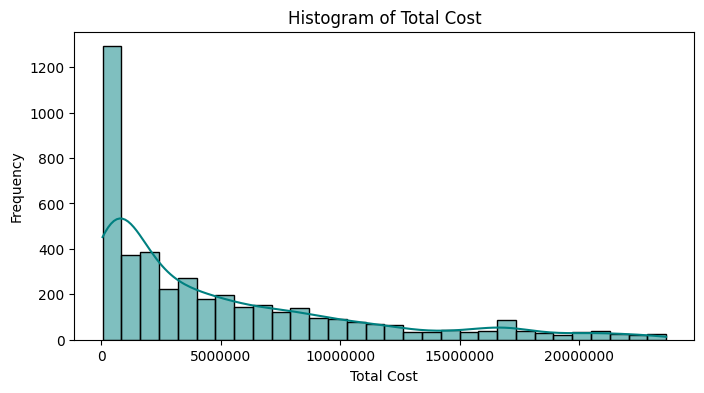

In [95]:
# Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_tanzania["total_cost"], bins=30, kde=True, color='teal')
plt.title('Histogram of Total Cost')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain')
plt.show()

## Train-Test Split

In [96]:
# split train-test data. We have dropped:
# "ID" as it is irrelevant for the case and 
# "most_impressing" as it is correlated with "purpose"


X = df_tanzania.drop(['total_cost','ID', "most_impressing", "country",'total_female','total_male','night_mainland', 'night_zanzibar','payment_mode','info_source','purpose','travel_with'],axis=1)
y = df_tanzania.total_cost

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=RSEED)
# Build new data frame for EDA

df_tanzania_train = X_train.join(y_train)
df_tanzania_test = X_test.join(y_test)

## EDA

In [97]:
df_tanzania_train.columns

Index(['age_group', 'main_activity', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'first_trip_tz', 'total_cost'],
      dtype='object')

In [98]:
sns.barplot(data=df_tanzania_train, x= 'purpose', y="total_cost")


ValueError: Could not interpret input 'purpose'

<Axes: xlabel='main_activity', ylabel='Count'>

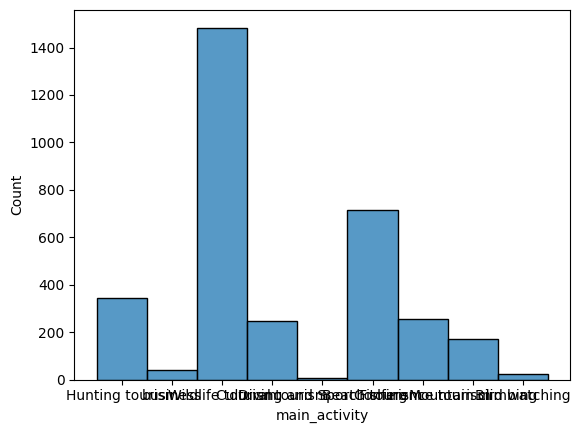

In [ ]:
sns.histplot(data=df_tanzania_train, x='main_activity')


In [23]:
# Check for empty values. We have them in "total_female", "total_male" and mostly in "travel_with"

df_tanzania_train.isnull().sum()

age_group                  0
travel_with              823
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
payment_mode               0
first_trip_tz              0
total_cost                 0
dtype: int64

In [24]:
# most of our features are categorical, besides four of them: 
# total_female, total_male, night_mainland, night_zanzibar and the total cost

df_tanzania_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3288 entries, 4428 to 958
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              3288 non-null   object 
 1   travel_with            2465 non-null   object 
 2   purpose                3288 non-null   object 
 3   main_activity          3288 non-null   object 
 4   info_source            3288 non-null   object 
 5   tour_arrangement       3288 non-null   object 
 6   package_transport_int  3288 non-null   object 
 7   package_accomodation   3288 non-null   object 
 8   package_food           3288 non-null   object 
 9   package_transport_tz   3288 non-null   object 
 10  package_sightseeing    3288 non-null   object 
 11  package_guided_tour    3288 non-null   object 
 12  package_insurance      3288 non-null   object 
 13  payment_mode           3288 non-null   object 
 14  first_trip_tz          3288 non-null   object 
 15  total_c

In [15]:
# Export unique values for all categorical features to analyze outside of VScode
unique_values = X_train.apply(lambda col: col.unique())
print('unique:',unique_values)
unique_values.to_csv('data/unique_Value_train_features.csv')

unique: age_group                                        [25-44, 45-64, 65+, 1-24]
travel_with              [Friends/Relatives, Alone, Spouse, nan, Spouse...
purpose                  [Meetings and Conference, Other, Leisure and H...
main_activity            [Hunting tourism, business, Wildlife tourism, ...
info_source              [Tanzania Mission Abroad, Travel, agent, tour ...
tour_arrangement                               [Independent, Package Tour]
package_transport_int                                            [No, Yes]
package_accomodation                                             [No, Yes]
package_food                                                     [No, Yes]
package_transport_tz                                             [No, Yes]
package_sightseeing                                              [No, Yes]
package_guided_tour                                              [No, Yes]
package_insurance                                                [No, Yes]
payment_mode     

## Some Plots

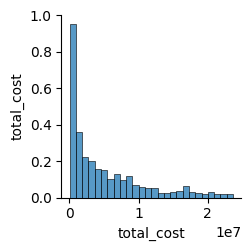

In [74]:
sns.pairplot(df_tanzania_train)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Hunting tourism'),
  Text(1, 0, 'business'),
  Text(2, 0, 'Wildlife tourism'),
  Text(3, 0, 'Cultural tourism'),
  Text(4, 0, 'Diving and Sport Fishing'),
  Text(5, 0, 'Beach tourism'),
  Text(6, 0, 'Conference tourism'),
  Text(7, 0, 'Mountain climbing'),
  Text(8, 0, 'Bird watching')])

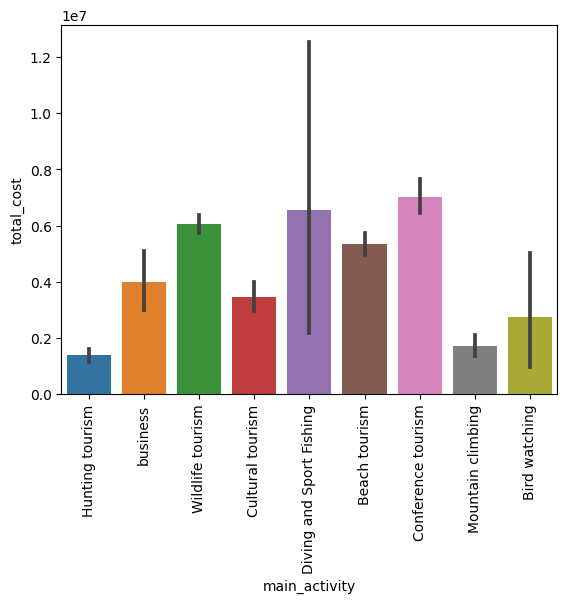

In [ ]:
sns.barplot(df_tanzania_train, x="main_activity", y="total_cost")
plt.xticks(rotation=90)

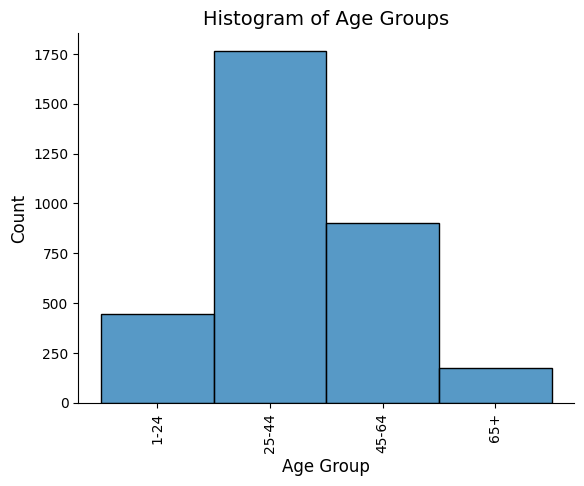

In [ ]:
# <Reorganize the age_group and make it categorical

custom_order = ['1-24', '25-44', '45-64', "65+"] 


# Convert 'age_group' into a categorical variable with the custom order
df_tanzania_train['age_group'] = pd.Categorical(
    df_tanzania_train['age_group'], 
    categories=custom_order, 
    ordered=True
)

# Plot the histogram
sns.histplot(data=df_tanzania_train, x='age_group', stat='count', palette="viridis")

# Aesthetics
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Histogram of Age Groups", fontsize=14)
plt.xticks(rotation=90)
sns.despine()


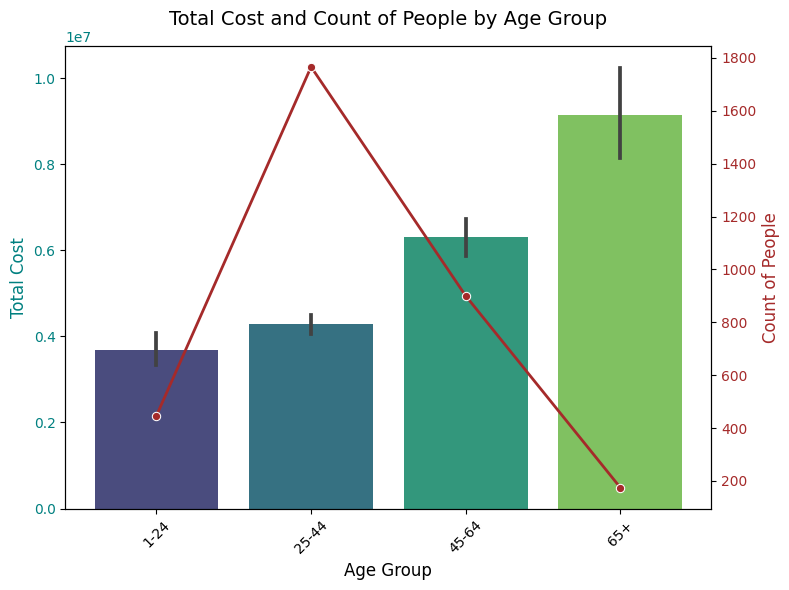

In [ ]:
# Group by age_group to calculate total cost and counts
grouped = df_tanzania_train.groupby('age_group').agg(
    total_cost=('total_cost', 'sum'),
    count=('total_cost', 'count')
).reindex(['1-24', '25-44', '45-64', "65+"])  # Ensure custom order

# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the bar chart for total cost
sns.barplot(x=df_tanzania_train.age_group, y=df_tanzania_train.total_cost, ax=ax1, palette="viridis")
ax1.set_ylabel("Total Cost", fontsize=12, color="teal")
ax1.set_xlabel("Age Group", fontsize=12)
ax1.tick_params(axis='y', labelcolor="teal")
ax1.tick_params(axis='x', rotation=45)
ax1.set_title("Total Cost and Count of People by Age Group", fontsize=14, pad=15)

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the line chart for the count of people
sns.lineplot(x=grouped.index, y=grouped['count'], ax=ax2, color="brown", marker="o", linewidth=2)
ax2.set_ylabel("Count of People", fontsize=12, color="brown")
ax2.tick_params(axis='y', labelcolor="brown")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Feature Engineering - Train

### Imputation

In [101]:
# Impute travel_with based on how many people they traveled with. If more than 1 - not alone. 

def travel_with_alone(row):
    travel_alone = row['travel_with']
    male = row['total_male']
    female = row['total_female']
    
    # Only process rows where 'travel_with' is NaN
    if pd.isnull(travel_alone):
        # Check if the person traveled alone
        if male == 1 and female == 0:  # One male, no females
            return "Alone"
        elif male == 0 and female == 1:  # One female, no males
            return "Alone"
        else:  # Any other combination means "Unknown"
            return "Unknown"
    else:
        # Keep the existing value if not NaN
        return travel_alone

### Encoding

In [102]:
df_tanzania_train.columns

Index(['age_group', 'main_activity', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'first_trip_tz', 'total_cost'],
      dtype='object')

In [79]:
#List of columns
col_encode = ['age_group','main_activity', 'tour_arrangement']
col_map = ['package_transport_int', 'package_accomodation', 'package_food','package_transport_tz', 'package_sightseeing', 'package_guided_tour','package_insurance','first_trip_tz']
#col_scale = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar']

In [80]:
df_tanzania_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3288 entries, 4428 to 958
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              3288 non-null   object 
 1   main_activity          3288 non-null   object 
 2   tour_arrangement       3288 non-null   object 
 3   package_transport_int  3288 non-null   object 
 4   package_accomodation   3288 non-null   object 
 5   package_food           3288 non-null   object 
 6   package_transport_tz   3288 non-null   object 
 7   package_sightseeing    3288 non-null   object 
 8   package_guided_tour    3288 non-null   object 
 9   package_insurance      3288 non-null   object 
 10  first_trip_tz          3288 non-null   object 
 11  total_cost             3288 non-null   float64
dtypes: float64(1), object(11)
memory usage: 463.0+ KB


In [ ]:
# Mapp all Yes/No features (col_map)

def mapping_tanzania(df,cols):
    df[cols] = df[cols].replace({'Yes': 1, 'No': 0}) 

mapping_tanzania(df_tanzania_train,col_map)

In [82]:
# Encode all categorical features (col_encode)
categories = [df_tanzania_train[col].unique() for col in col_encode]

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', categories=categories)
ohe.fit(df_tanzania_train[col_encode]) 
t = ohe.transform(df_tanzania_train[col_encode])

# Purpose: It generates the new feature names created during one-hot encoding, reflecting the original categorical feature and its unique values.
ohe.get_feature_names_out() 
df_tanzania_train_encode = pd.DataFrame(t, columns= ohe.get_feature_names_out())

# introduced into the frame
df_tanzania_train = pd.concat([df_tanzania_train.reset_index(drop=True), df_tanzania_train_encode], axis=1)
df_tanzania_train.drop(columns=col_encode,inplace=True)

In [83]:
df_tanzania_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   package_transport_int                   3288 non-null   int64  
 1   package_accomodation                    3288 non-null   int64  
 2   package_food                            3288 non-null   int64  
 3   package_transport_tz                    3288 non-null   int64  
 4   package_sightseeing                     3288 non-null   int64  
 5   package_guided_tour                     3288 non-null   int64  
 6   package_insurance                       3288 non-null   int64  
 7   first_trip_tz                           3288 non-null   int64  
 8   total_cost                              3288 non-null   float64
 9   age_group_45-64                         3288 non-null   float64
 10  age_group_65+                           3288 non-null   floa

In [108]:
# #Scale all numerical features (col_scale)

# scaler = MinMaxScaler()
# scaler.fit(df_tanzania_train[col_scale])
# t = scaler.transform(df_tanzania_train[col_scale])
# df_tanzania_train_scaled = pd.DataFrame(t, columns= scaler.get_feature_names_out())
# df_tanzania_train_scaled.head()

# # introduced into the frame
# df_tanzania_train = pd.concat([df_tanzania_train.reset_index(drop=True), df_tanzania_train_scaled], axis=1)
# df_tanzania_train.drop(columns=col_scale,inplace=True)'

In [104]:
# # Create a scaler for total_cost
# scaler_cost = MinMaxScaler()

# # Fit and transform the total_cost column
# scaled_values = scaler_cost.fit_transform(df_tanzania_train[["total_cost"]])

# # Replace the original total_cost column in the DataFrame with the scaled values
# df_tanzania_train["total_cost"] = scaled_values

In [109]:
df_tanzania_train.shape

(3288, 21)

### Encoding - Pipeline / ColumnTransformer (WiP)

In [106]:
# # Custom transformer for `travel_with`
# class TravelWithTransformer(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         # Apply the logic for `travel_with` as described
#         X = X.copy()
#         for index, row in X.iterrows():
#             if pd.isnull(row['travel_with']):
#                 male = row['total_male']
#                 female = row['total_female']
#                 if male == 1 and female == 0:
#                     X.at[index, 'travel_with'] = 'Alone'
#                 elif male == 0 and female == 1:
#                     X.at[index, 'travel_with'] = 'Alone'
#                 else:
#                     X.at[index, 'travel_with'] = 'Unknown'
#         return X[['travel_with']]

#     def get_feature_names_out(self, input_features=None):
#         # Return the output column name for `travel_with`
#         return ['travel_with']

In [107]:
# # Custom imputer transformer to round the mean
# class RoundedMeanImputer(TransformerMixin, BaseEstimator):
#     def fit(self, X, y=None):
#         self.means_ = X.mean().round()
#         return self

#     def transform(self, X):
#         return X.fillna(self.means_)
    
#     def get_feature_names_out(self, input_features=None):
#         # Return the same feature names as the input
#         return input_features

In [108]:
# # ColumnTransformer with RoundedMeanImputer
# preprocessor = ColumnTransformer(
#     transformers=[
#         # Custom imputer for total_female and total_male using rounded mean
#         ('impute_num', RoundedMeanImputer(), ['total_female', 'total_male']),
        
#         # Map Yes/No features to 1/0 directly
#         ('map_binary', OneHotEncoder(drop='if_binary', sparse=False), col_map),

#         # Custom transformer for travel_with
#         ('custom_travel_with', TravelWithTransformer(), ['travel_with', 'total_male', 'total_female']),
        
#         # One-hot encode categorical features
#         ('ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), col_encode),
        
#         # Scale numerical features
#         ('scale', MinMaxScaler(), col_scale)
#     ],
#     remainder='passthrough'  # Keeps any columns not explicitly listed
# )

# # Full pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor)
# ])


In [109]:
# # Fit and transform the data
# df_processed = pipeline.fit_transform(df_tanzania_train)

# # Convert to DataFrame
# output_columns = pipeline.named_steps['preprocessor'].get_feature_names_out()
# df_processed = pd.DataFrame(df_processed, columns=output_columns)

# # Verify results
# print("Shape of processed DataFrame:", df_processed.shape)
# print("Remaining NaN values:", df_processed.isna().sum().sum())

## Feature Engineering - Test

In [101]:
df_tanzania_test = X_test.join(y_test)

### Imputation

In [112]:
# # Impute empty values of "total_female" with rounded mean. 
# # Impute empty values of "total_male" with rounded mean. 
# # 
# df_tanzania_test['total_female'].fillna(round(df_tanzania_test['total_female'].mean()), inplace=True)
# df_tanzania_test['total_male'].fillna(round(df_tanzania_test['total_male'].mean()), inplace=True)

In [113]:
# # Apply the function to the DataFrame
# df_tanzania_test['travel_with'] = df_tanzania_test.apply(travel_with_alone, axis=1)


### Encoding

In [102]:
mapping_tanzania(df_tanzania_test,col_map)

In [103]:
# Encode all categorical features (col_encode)

ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', categories=categories)
ohe.fit(df_tanzania_test[col_encode]) 
t = ohe.transform(df_tanzania_test[col_encode])

# Purpose: It generates the new feature names created during one-hot encoding, reflecting the original categorical feature and its unique values.
ohe.get_feature_names_out() 
df_tanzania_test_encode = pd.DataFrame(t, columns= ohe.get_feature_names_out())

# introduced into the frame
df_tanzania_test = pd.concat([df_tanzania_test.reset_index(drop=True), df_tanzania_test_encode], axis=1)
df_tanzania_test.drop(columns=col_encode,inplace=True)

In [116]:
# # Scale all numerical features (col_scale)

# scaler = MinMaxScaler()
# scaler.fit(df_tanzania_test[col_scale])
# t = scaler.transform(df_tanzania_test[col_scale])
# df_tanzania_test_scaled = pd.DataFrame(t, columns= scaler.get_feature_names_out())
# df_tanzania_test_scaled.head()

# # introduced into the frame
# df_tanzania_test = pd.concat([df_tanzania_test.reset_index(drop=True), df_tanzania_test_scaled], axis=1)
# df_tanzania_test.drop(columns=col_scale,inplace=True)

In [117]:
# # Create a scaler for total_cost
# scaler_cost = MinMaxScaler()

# # Fit and transform the total_cost column
# scaled_values = scaler_cost.fit_transform(df_tanzania_test[["total_cost"]])

# # Replace the original total_cost column in the DataFrame with the scaled values
# df_tanzania_test["total_cost"] = scaled_values

In [104]:
df_tanzania_train.shape

(3288, 12)

In [105]:
df_tanzania_test.shape

(1097, 21)

## Baseline Model: Decision Tree

In [109]:
df_tanzania_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   package_transport_int                   1097 non-null   int64  
 1   package_accomodation                    1097 non-null   int64  
 2   package_food                            1097 non-null   int64  
 3   package_transport_tz                    1097 non-null   int64  
 4   package_sightseeing                     1097 non-null   int64  
 5   package_guided_tour                     1097 non-null   int64  
 6   package_insurance                       1097 non-null   int64  
 7   first_trip_tz                           1097 non-null   int64  
 8   total_cost                              1097 non-null   float64
 9   age_group_45-64                         1097 non-null   float64
 10  age_group_65+                           1097 non-null   floa

In [111]:
df_tanzania_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3288 entries, 4428 to 958
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age_group              3288 non-null   object 
 1   main_activity          3288 non-null   object 
 2   tour_arrangement       3288 non-null   object 
 3   package_transport_int  3288 non-null   object 
 4   package_accomodation   3288 non-null   object 
 5   package_food           3288 non-null   object 
 6   package_transport_tz   3288 non-null   object 
 7   package_sightseeing    3288 non-null   object 
 8   package_guided_tour    3288 non-null   object 
 9   package_insurance      3288 non-null   object 
 10  first_trip_tz          3288 non-null   object 
 11  total_cost             3288 non-null   float64
dtypes: float64(1), object(11)
memory usage: 463.0+ KB


In [112]:
#from sklearn.preprocessing import LabelEncoder
X_train_b = df_tanzania_train.drop(["total_cost",'age_group'], axis=1)
y_train_b = df_tanzania_train["total_cost"]
X_test_b = df_tanzania_test.drop(["total_cost",'age_group'], axis=1)
y_test_b = df_tanzania_test["total_cost"]

#y_train_b = LabelEncoder().fit_transform(y_train_b)

#RSEED = 42

KeyError: "['age_group'] not found in axis"

In [39]:
from sklearn.ensemble import RandomForestClassifier


# Create the model with 100 trees
baseline= RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
baseline.fit(X_train_b, y_train_b)

ValueError: could not convert string to float: 'Hunting tourism'

In [120]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.tree import DecisionTreeClassifier

# # # Initialize baseline model Regressor
# baseline = DecisionTreeRegressor(max_features=2)
# baseline.fit(X_train_b, y_train_b)


DecisionTreeRegressor(max_features=2)

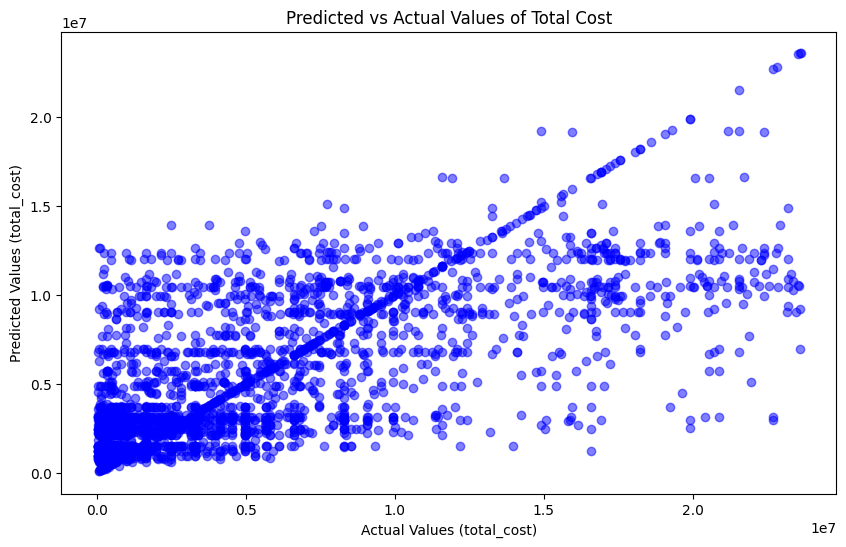

In [121]:
# Actual values
y_pred = baseline.predict(X_train_b)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_train_b, y_pred, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # line of perfect predictions (45-degree line)
plt.xlabel('Actual Values (total_cost)')
plt.ylabel('Predicted Values (total_cost)')
plt.title('Predicted vs Actual Values of Total Cost')
plt.show()

In [122]:
from sklearn.metrics import r2_score
# Assuming 'model' is your trained model and X_test, y_test are your test data
y_pred = baseline.predict(X_test_b)  # Model prediction on the test set

# 1. Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_b, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 2. Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 3. Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_b, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 4. Calculate R-squared (R²)
r2 = r2_score(y_test_b, y_pred)
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 23984764829547.293
Root Mean Squared Error (RMSE): 4897424.305647541
Mean Absolute Error (MAE): 3324639.050971721
R-squared (R²): 0.256368009858277
